<a href="https://colab.research.google.com/github/francomanca93/fundamentos-de-estadistica-con-python/blob/basico/Conceptos%20b%C3%A1sicos%20del%20curso/2_Conceptos_clave_sobre_estad%C3%ADstica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Conceptos clave sobre estadística

1. **Tipos de datos**:

- **Numéricos**

    Valores continuos, porcentajes y enteros

- **Categóricos**

    Categóricas ordinales (fechas, estratos) y clases sin sentido ordinal (Países o colores).



2. **Variables deterministicas vs variables aleatorias**

- Determinista: Asume un valor puntual.
- Incertidummbre
- Aleatoriedad: Puede tomar una serie de valores, pero conocemos todos los valores posibles, que puede tomar una variable aleatoria.

**Experimento o fenómeno determinista**: al repetirlo en idénticas condiciones se obtiene el mismo resultado. 

**Experimento o fenómeno aleatorio**: si lo repetimos con las mismas condiciones iniciales no garantiza los mismos resultados.

La estadística se ocupa de aquellos fenómenos no deterministas donde es imposible predecir los resultados.

3. Cálculo de probabilidad en aleatorias univaridas:

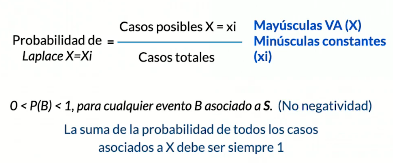

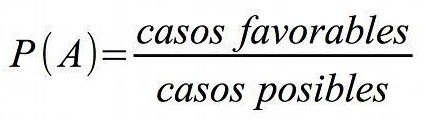

Todos los eventos son equiprobables

La suma de todos deben dar:

0 < p(a) < 1


Empecemos cargando las librerias mas importantes para empezar con el analisis

In [2]:
import numpy as np
import datetime
from datetime import date

En python, con la función type() podemos saber el tipo de datos

In [5]:
type('1')
type(0)
type(1.1)

float

En python podemos hacer calculos sencillos sin necesidad de exportar ningun módulo adicional

In [6]:
1 + 1 # Suma
1 - 1 # Resta
1/2 # Division
3%2 # Modulo
3**2 # Potencia
3*2 # Multiplicacion

6

Tambien podemos hacer comparaciones y operaciones booleanas

In [8]:
(1 > 2) & (1 < 2) # Comparacion y operador booleano and
(1 > 2) | (1 < 2) # Comparacion y operador booleano and

True

Tenemos otros tipos de datos para almacenar datos

In [9]:
list_1 = ['1', 0, [1, 2]]
list_1[2]

[1, 2]

## Bernoulli

Supongamos que tenemos dos posibles opciones al tirar una moneda

In [10]:
universo = ['cara', 'sello']

La probabilidad de que nos toque cara es de 1 entre 2 posibles opciones.

In [11]:
p_cara = 1/2

En teoría de probabilidad y estadística, la [distribución de Bernoulli](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_de_Bernoulli) (o distribución dicotómica), nombrada así por el matemático suizo Jacob Bernoulli, es una distribución de probabilidad discreta, que toma valor 1 para la probabilidad de éxito **( p )** y valor 0 para la probabilidad de fracaso **( q = 1 − p )**. 

Importamos el modulo bernoulli de la libreria de estadistica de scipy.


In [14]:
from scipy.stats import bernoulli

Del modulo bernoulli usamos la funcion rvs(), **random variable sample**. 

In [22]:
valor = bernoulli.rvs(p=p_cara)
universo[valor]

'cara'

Con el parámetro size me devuelve un array de los n lanzamientos ejecutados, sirve para repetir varias veces el experimento.


In [26]:
bernoulli.rvs(p=p_cara, size=10)

array([1, 0, 0, 1, 0, 0, 0, 1, 1, 0])

## Distribucion binomial

Podemos sumar la cantidad de valores True obtenidos de una distribucion aleatorio de bernoulli

In [24]:
sum(bernoulli.rvs(p=p_cara, size=10))

4

Esto es variable importante, es la [distribucion binomial](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_binomial)


La distribución binomial es una distribución de probabilidad discreta que cuenta el número de éxitos en una secuencia de n ensayos de Bernoulli independientes entre sí, con una probabilidad fija p de ocurrencia del éxito entre los ensayos. 

En resumen: Es una suma de n experimentos independientes de Bernoulli.

Tambien lo podemos hacer con un módulo especifico de la librerias de estadisticas de scipy.

In [25]:
from scipy.stats import binom

Generemos una muestra, pero ahora de la variable Bernoulli y repetimos el experimeno 100 veces. 

In [28]:
binom.rvs(p=p_cara, n = 10, size = 100)

array([6, 6, 5, 4, 4, 5, 7, 6, 6, 7, 5, 4, 5, 6, 5, 9, 1, 5, 5, 4, 7, 4,
       3, 7, 4, 4, 4, 6, 2, 4, 5, 5, 1, 6, 4, 3, 5, 7, 4, 4, 6, 5, 5, 2,
       4, 2, 6, 7, 6, 2, 5, 7, 4, 3, 5, 3, 4, 5, 5, 4, 7, 8, 6, 4, 7, 4,
       6, 3, 5, 5, 5, 4, 6, 2, 4, 3, 3, 3, 7, 6, 5, 3, 6, 3, 8, 5, 6, 7,
       3, 6, 5, 3, 5, 3, 4, 3, 3, 5, 8, 9])

Con esto podemos ver que algunos valores se repiten con mayor frecuencia dentro de la prueba que otros. Esto nos lleva al concepto de una distribucion de probabilidad, donde algunos valores van a aparecer con mayor frecuencia dentro de la distribucion.

Esto a modo de generar una intuicion estadistica de los posibles valores que va a tomar un experimento vamos a generar un dataframe.

In [29]:
import pandas as pd

In [34]:
pd.Series(binom.rvs(p=p_cara, n = 10, size = 100)).value_counts()

4    25
6    21
5    18
3    13
7    11
8     6
2     5
9     1
dtype: int64

Si quisieramos convertir lo anterior en una probabilidad deberiamos devidir por la cantidad de casos evaluados.

In [35]:
pd.Series(binom.rvs(p=p_cara, n = 10, size = 100)).value_counts()/100

4    0.23
5    0.22
7    0.18
6    0.15
3    0.12
8    0.04
9    0.02
2    0.02
1    0.02
dtype: float64